# Resolviendo tareas usando Machine Learning

La compa√±√≠a de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y nos pide evaluar esa posibilidad.

Para ello realizaremos un modelo de ML para podre resolver las siguientes tareas:

- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudar√° a los agentes de la compa√±√≠a con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestaci√≥n del seguro. ¬øPuede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el n√∫mero de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresi√≥n lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformaci√≥n de datos que dificulte la recuperaci√≥n de la informaci√≥n personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscaci√≥n de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.

**Tabla de contenido:**

1. Inicializaci√≥n
2. Carga de datos
3. An√°lisis exploratorio de datos
4. Tarea 1: Clientes similares
5. Tarea 2: ¬øEs probable que un cliente reciba una prestaci√≥n del seguro?
6. Tarea 3: Cantidad de seguros que recibir√° un nuevo cliente
7. Tarea 4: Ofuscar datos
8. Conclusiones

**Objetivos**

1. Encontrar clientes que sean similares a un cliente determinado. Esto ayudar√° a los agentes de la compa√±√≠a con el marketing.
2. Predecir la probabilidad de que un nuevo cliente reciba una prestaci√≥n del seguro. ¬øPuede un modelo de predictivo funcionar mejor que un modelo dummy?
3. Predecir el n√∫mero de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresi√≥n lineal.
4. Proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior


Descripci√≥n de los datasets del proyecto:

- `gender`: g√©nero del cliente
- `age`: edad del cliente
- `income`: ingresos del cliente
- `family_members`: cantidad de miembros de familia
- `insurance_benefits`: cantidad de beneficios del seguro

# Preprocesamiento y exploraci√≥n de datos

## Inicializaci√≥n

In [1]:
# Instalar actualizaci√≥n de scikit-learn
%pip install scikit-learn --upgrade

  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar librer√≠as necesarias
import math
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Carga de datos

Ahora procederemos a cargar los datos y hacer una revsi√≥n previa de ellos.

In [3]:
# Cargar data
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el c√≥digo se vea m√°s coherente con su estilo.

In [4]:
# Crear funci√≥n para renombrar columnas
def to_snake_case(name):
    name = name.replace(' ', '_')
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Renombrar columnas
df.columns = [to_snake_case(col) for col in df.columns]
df = df.rename(columns={'salary': 'income'})
df.head(1)

gender   age   income  family_members  insurance_benefits
0       1  41.0  49600.0               1                   0

In [5]:
# Ver sample de data
df.sample(10)

gender   age   income  family_members  insurance_benefits
1945       1  31.0  36600.0               3                   0
1221       0  31.0  49900.0               1                   0
4854       1  22.0  30300.0               1                   0
2284       0  43.0  53200.0               1                   1
2965       0  44.0  46300.0               0                   1
2119       1  24.0  44200.0               1                   0
730        0  44.0  48400.0               0                   1
4524       0  18.0  36900.0               1                   0
1249       1  41.0  36000.0               3                   0
1749       1  48.0  46700.0               2                   1

In [6]:
# Ver detalles de la tabla
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# Cambiar 'age' a tipo entero
df['age'] = df['age'].astype('int')

In [8]:
# Comprobar conversi√≥n
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# Verificar estad√≠sticas descriptivas
df.describe()

gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000

Al parecer nuestra data no tiene ning√∫n problema hasta el momento.

## An√°lisis exploratorio de datos

Ahora veremos como se est√° ditribuyendo nuestros datos por cada columna de esta usando gr√°ficos de caja.

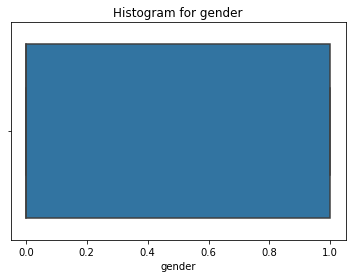

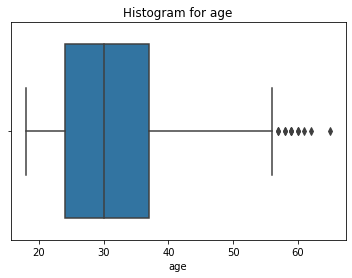

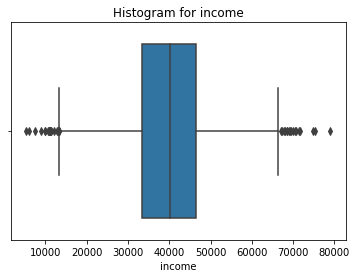

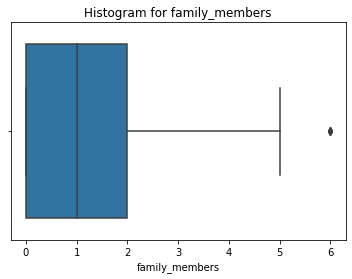

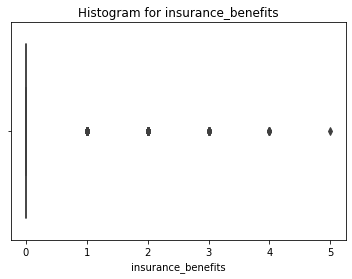

In [10]:
# Analizar la distribuci√≥n de la data por columna
for column in df.columns:
    plt.figure()
    sns.boxplot(data=df, x=column)
    plt.title(f'Histogram for {column}')
    plt.show()    

Vamos a comprobar r√°pidamente si existen determinados grupos de clientes observando el gr√°fico de pares.

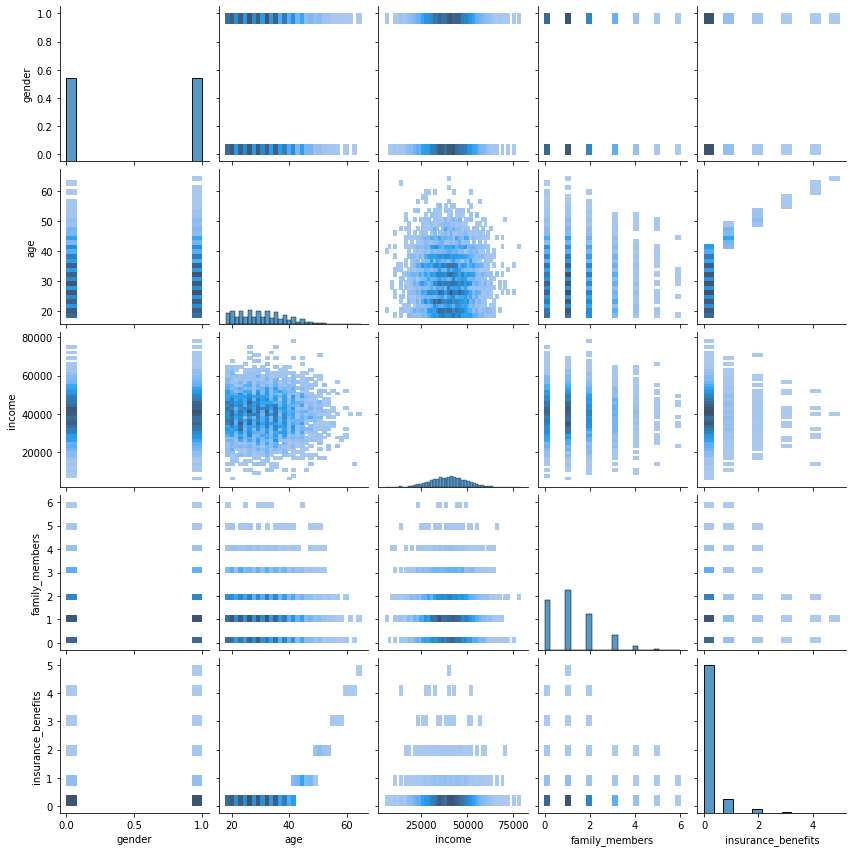

In [11]:
# Graficar gr√°fico de pares
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (cl√∫steres) ya que es dif√≠cil combinar diversas variables simult√°neamente (para analizar distribuciones multivariadas). Ah√≠ es donde LA y ML pueden ser bastante √∫tiles.

## Tarea 1: Clientes similares

Para resolver la primera tarea desarrollaremos un modelo que devuleva los k vecinos m√°s cercanos para un objeto dado bas√°ndose en la distancia entre los estos. 

En nuestro caso, estos objetos ser√≠an clientes y el modelo que usaremos ser√° NearestNeighbors. Usaremos dos tipos de distancia: Euclidiana y Manhattan. 

Por √∫ltimo, comprobaremos nuestros resultados escalando nuestros datos versus los datos originales.

In [12]:
# Establecer features
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
# Crear funci√≥n para obtener los clientes m√°s cercanos
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos m√°s cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: n√∫mero de objetos para los que se buscan los vecinos m√°s cercanos    :param k: n√∫mero de vecinos m√°s cercanos a devolver
    :param m√©trica: nombre de la m√©trica de distancia    """

    nbrs = NearestNeighbors(metric = metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [14]:
# Comprobar funci√≥n utilizando m√©todo Euclidiana
df_euclidean_no_escalated = get_knn(df, 240, 10, 'euclidean')
df_euclidean_no_escalated

gender  age   income  family_members  insurance_benefits  distance
240        1   31  41500.0               0                   0  0.000000
3693       1   30  41500.0               1                   0  1.414214
548        1   33  41500.0               0                   0  2.000000
1928       0   33  41500.0               1                   0  2.449490
747        0   33  41500.0               1                   0  2.449490
4534       0   34  41500.0               0                   0  3.162278
3280       0   34  41500.0               1                   0  3.316625
3961       0   28  41500.0               1                   0  3.316625
2389       1   34  41500.0               2                   0  3.605551
4982       1   29  41500.0               3                   0  3.605551

In [15]:
# Comprobar funci√≥n utilizando m√©todo Manhattan
df_manhattan_no_escalated = get_knn(df, 240, 10, 'manhattan')
df_manhattan_no_escalated

gender  age   income  family_members  insurance_benefits  distance
240        1   31  41500.0               0                   0       0.0
3693       1   30  41500.0               1                   0       2.0
548        1   33  41500.0               0                   0       2.0
1928       0   33  41500.0               1                   0       4.0
4534       0   34  41500.0               0                   0       4.0
747        0   33  41500.0               1                   0       4.0
3279       0   27  41500.0               0                   0       5.0
4982       1   29  41500.0               3                   0       5.0
3961       0   28  41500.0               1                   0       5.0
2389       1   34  41500.0               2                   0       5.0

Se observa que los resultados en cuanto a los objetos similares son los mismos utilizando ambos m√©todos. Sin embargo, la distancia calculada por la m√©trica Manhattan no es tan exacta lo que causa que de valores de distancia iguales para diferentes objetos. Ello no permite identificar cual es el m√°s cercano al n√∫mero de objeto escogido.

Para que el modelo Manhattan sea m√°s exacta, escalaremos los datos con el m√©todo [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) y comprobaremos nuevamente el resultado.

In [16]:
# Escalar datos
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [17]:
# Comprobar de escalado de datos
df_scaled.sample(5)

gender       age    income  family_members  insurance_benefits
130      0.0  0.323077  0.624051        0.000000                   0
2860     1.0  0.707692  0.650633        0.166667                   1
1990     1.0  0.292308  0.526582        0.166667                   0
4317     1.0  0.446154  0.368354        0.166667                   0
3643     0.0  0.492308  0.551899        0.000000                   0

Ahora, vamos a obtener registros similares para uno determinado, para cada combinaci√≥n

In [18]:
# Comprobar funci√≥n utilizando m√©todo Euclidiana
df_euclidean_escalated = get_knn(df_scaled, 240, 10, 'euclidean')
df_euclidean_escalated

gender       age    income  family_members  insurance_benefits  distance
240      1.0  0.476923  0.525316             0.0                   0  0.000000
4389     1.0  0.476923  0.536709             0.0                   0  0.011392
4660     1.0  0.476923  0.540506             0.0                   0  0.015190
1219     1.0  0.492308  0.517722             0.0                   0  0.017157
2476     1.0  0.461538  0.517722             0.0                   0  0.017157
2368     1.0  0.492308  0.534177             0.0                   0  0.017754
3298     1.0  0.461538  0.516456             0.0                   0  0.017754
381      1.0  0.461538  0.512658             0.0                   0  0.019923
4191     1.0  0.461538  0.510127             0.0                   0  0.021620
1571     1.0  0.476923  0.548101             0.0                   0  0.022785

In [19]:
# Comprobar funci√≥n utilizando m√©todo Manhattan
df_manhattan_escalated = get_knn(df_scaled, 240, 10, 'manhattan')
df_manhattan_escalated

gender       age    income  family_members  insurance_benefits  distance
240      1.0  0.476923  0.525316             0.0                   0  0.000000
4389     1.0  0.476923  0.536709             0.0                   0  0.011392
4660     1.0  0.476923  0.540506             0.0                   0  0.015190
1571     1.0  0.476923  0.548101             0.0                   0  0.022785
1219     1.0  0.492308  0.517722             0.0                   0  0.022980
2476     1.0  0.461538  0.517722             0.0                   0  0.022980
2368     1.0  0.492308  0.534177             0.0                   0  0.024245
3298     1.0  0.461538  0.516456             0.0                   0  0.024245
2747     1.0  0.476923  0.500000             0.0                   0  0.025316
187      1.0  0.476923  0.551899             0.0                   0  0.026582

**¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?** 

Al escalar los datos, la m√©trica de Manhattan calcula la distancia de manera m√°s exacta a diferencia sin usar los datos escalados.

**¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?** 

Por otro lado, independientemente si los datos est√°n escalados o no, los resultados usando la distancia Euclidiana y Manhattan son muy similares respecto a los objetos resultantes, pero no id√©nticos.

## Tarea 2: ¬øEs probable que el cliente reciba una prestaci√≥n del seguro?

En t√©rminos de machine learning podemos considerarlo como una tarea de clasificaci√≥n binaria.

En t√©rminos de ML podemos considerar esta tarea como una de clasifiaci√≥n binaria. Tomaremos `insurance_benefits` con valores superiores a cero como target (recibe prestaci√≥n del seguro). Con ello construiremos un modelo basado en KNN usando como m√©trica F1 para medir el modelo. 

Asimismo, contruir√©mos un modelo dummy (modelo aleatorio), el cual devuelva "1" con cierta probabilidad. Probaremos cuatros valores de probabilidad: 0, la probabilidad de pagar cualquier prestaci√≥n del seguro, 0.5, 1.

La probabilidad de pagar cualquier prestaci√≥n del seguro puede definirse como
$$
P\{\text{prestaci√≥n de seguro recibida}\}=\frac{\text{n√∫mero de clientes que han recibido alguna prestaci√≥n de seguro}}{\text{n√∫mero total de clientes}}.
$$

Dividimos todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30.

In [20]:
# Calcular el objetivo
df['insurance_benefits_received'] = df['insurance_benefits'].apply(lambda x: 1 if x > 0 else 0)
df.head()

gender  age   income  family_members  insurance_benefits  \
0       1   41  49600.0               1                   0   
1       0   46  38000.0               1                   1   
2       0   29  21000.0               0                   0   
3       0   21  41700.0               2                   0   
4       1   28  26100.0               0                   0   

   insurance_benefits_received  
0                            0  
1                            1  
2                            0  
3                            0  
4                            0

In [21]:
# Comprobar el desequilibrio de clases con value_counts()
df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [22]:
# Crear funci√≥n para evaluar el modelo
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes alg√∫n problema con la siguiente l√≠nea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusi√≥n')
    print(cm)

In [23]:
# Generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [24]:
# Obtener las probalidades del modelo aleatorio
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df['insurance_benefits_received'])) # c√≥digo hecho por ricardo
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusi√≥n
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusi√≥n
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusi√≥n
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusi√≥n
[[0.     0.8872]
 [0.     0.1128]]



In [25]:
# Definir target y objetivo del modelo
features = df.drop(['insurance_benefits_received'], axis=1)
target = df['insurance_benefits_received']

In [26]:
# Dividir en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42)

In [27]:
# Crear modelo de clasificaci√≥n para datos originales
for k in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    
    # Hallar y_pred
    y_pred = neigh.predict(x_test)
    
    eval_classifier(y_test, y_pred)

F1: 0.65
Matriz de confusi√≥n
[[0.87533333 0.01733333]
 [0.04666667 0.06066667]]
F1: 0.38
Matriz de confusi√≥n
[[0.89066667 0.002     ]
 [0.082      0.02533333]]
F1: 0.39
Matriz de confusi√≥n
[[0.884      0.00866667]
 [0.07933333 0.028     ]]
F1: 0.16
Matriz de confusi√≥n
[[0.88933333 0.00333333]
 [0.098      0.00933333]]
F1: 0.17
Matriz de confusi√≥n
[[0.884      0.00866667]
 [0.09666667 0.01066667]]
F1: 0.09
Matriz de confusi√≥n
[[8.92000000e-01 6.66666667e-04]
 [1.02000000e-01 5.33333333e-03]]
F1: 0.10
Matriz de confusi√≥n
[[0.89133333 0.00133333]
 [0.10133333 0.006     ]]
F1: 0.02
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.106      0.00133333]]
F1: 0.04
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]
F1: 0.04
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]


In [28]:
# Escalar los features del modelo
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
# Crear modelo de clasificaci√≥n para datos escalados
for k in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train_scaled, y_train)
    
    # Hallando y_pred
    y_pred = neigh.predict(x_test_scaled)
    
    eval_classifier(y_test, y_pred)

F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]
F1: 1.00
Matriz de confusi√≥n
[[0.89266667 0.        ]
 [0.         0.10733333]]


C√≥mo se pudo observar, comparadon nuestro modelo de KNN y el modelo dummy, nuestro modelo obtiene mejores resultados. Asimismo, se demostr√≥ que escalando nuestros datos previamente mejora nuestro modelo obteniendo un valor de F1 de ...

## Tarea 3: Cantidad de seguros que recibir√° un nuevo cliente

Con `insurance_benefits` como objetivo, evaluaremos cu√°l ser√≠a la RECM de un modelo de regresi√≥n lineal.

Construiremos una implementaci√≥n de regresi√≥n lineal. Comprobaremos la RECM tanto para los datos originales como para los escalados y veremos si hay alguna diferenica al respecto en funci√≥n al RECM.

Denotemos- $X$: matriz de caracter√≠sticas; cada fila es un caso, cada columna es una caracter√≠stica, la primera columna est√° formada por unidades- $y$ ‚Äî objetivo (un vector)- $\hat{y}$ ‚Äî objetivo estimado (un vector)- $w$ ‚Äî vector de pesos
La tarea de regresi√≥n lineal en el lenguaje de las matrices puede formularse as√≠:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una soluci√≥n anal√≠tica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La f√≥rmula anterior puede servir para encontrar los pesos $w$ y estos √∫ltimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

In [30]:
# Crear clase para obtener las predicciones
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # a√±adir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # a√±adir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights)
        
        return y_pred

In [31]:
# Generar funci√≥n para evaluar el modelo
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [32]:
# Generar el modelo con los datos originales
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [33]:
# Generar el modelo con los datos escalados
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = MyLinearRegression()

lr.fit(X_train_scaled, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test_scaled)
eval_regressor(y_test, y_test_pred)

[ 0.14971429  0.30292778  0.0082117  -0.00258294 -0.01271039]
RMSE: 0.34
R2: 0.66


Escalando nuestro datos obtenemos unas mejores m√©tricas, esto se debe a que las caracter√≠sticas no presentan un misma escabilidad. Est√°n en diferentes unidades lo que causa que el modelo no resulte √≥ptimo, escalando los datos podemos eliminar este problema.

## Tarea 4: Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las caracter√≠sticas num√©ricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba c√≥mo quedar√°n los valores de las caracter√≠sticas despu√©s de la transformaci√≥n. Por cierto, la propiedad de invertibilidad es importante aqu√≠, as√≠ que aseg√∫rate de que $P$ sea realmente invertible.

Puedes revisar la lecci√≥n 'Matrices y operaciones matriciales -> Multiplicaci√≥n de matrices' para recordar la regla de multiplicaci√≥n de matrices y su implementaci√≥n con NumPy.

In [34]:
# Establecer columnas
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [35]:
# Generar X
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [36]:
# Generar P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

**Ahora comprobaremos que la matriz P sea invertible, para que una matriz sea invertible su multiplicaci√≥n con su inversa debe resultar en una matriz de identidad (matriz cuadrada con unos a lo largo de la diagonal principal y ceros en el resto).**

In [37]:
# Comprobar que la matriz P sea invertible
P.dot(np.linalg.inv(P))

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

¬øPuedes adivinar la edad o los ingresos de los clientes despu√©s de la transformaci√≥n?

Ahora realizaremos la transformaci√≥n multiplicando la l¬ømatriz X por P.

In [38]:
# Realizar transformaci√≥n
X_ofuscado = X @ P
X_ofuscado

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Como podemos ver los datos ya no son reconocibles, eso significa que hemos ofuscado correctamente nuestros datos.

Ahora, habiendo hecho la transformaci√≥n. ¬øPodemos recuperar los datos originales de $X'$ si conoces $P$?. Comprob√©moslo.

In [39]:
# Comprobar que podemos recuperar los datos
X_recuperated = X_ofuscado @ np.linalg.inv(P)
X_recuperated

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Para comprobar que hemos recuperado nuestros datos validaremos tres casos de algunos clientes con los datos originales

In [40]:
# Validar recuperaci√≥n
for i in range(0,3):
    print(f'Original {i}:')
    print(X[i])
    print(f'Recuperado {i}:')
    print(X_recuperated[i])
    print()

Original 0:
[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Recuperado 0:
[1.00e+00 4.10e+01 4.96e+04 1.00e+00]

Original 1:
[0.0e+00 4.6e+01 3.8e+04 1.0e+00]
Recuperado 1:
[-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]

Original 2:
[    0.    29. 21000.     0.]
Recuperado 2:
[-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]



Los datos no son exactamente iguales, tienen una varici√≥n m√≠nima si llegamos a interpretar los datos tomando en cuanto los ceros que se deben a√±adir.

### Prueba de que la ofuscaci√≥n de datos puede funcionar con regresi√≥n lineal

Ahora que tenemos nuestros datos ofuscados debemos tener en cuenta que la ofuscaci√≥n no afecta nuestra regis√≥n lineal. Para ello lo demostraremos anal√≠ticamente:

Entonces, los datos est√°n ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¬øC√≥mo se relacionar√≠an $w$ y $w_P$ si simplific√°ramos la f√≥rmula de $w_P$ anterior? 

$$
w_P = P^{-1} [(X)^T X]^{-1} (X)^T y \quad \Rightarrow \quad w_P = P^{-1} w
$$

¬øCu√°les ser√≠an los valores predichos con $w_P$? 

$$
Y_P = X_P P^{-1} w
$$

¬øQu√© significa esto para la calidad de la regresi√≥n lineal si esta se mide mediante la RECM?

Para demostrar como afectar√≠a la calidad de la regresi√≥n linela mediante la RECM aplicaremos los siguientes pasos en la f√≥rmula:

1- Sustituir wp y aplicar propiedad distributiva:

$$
y_P = (XP) (P^{-1}) w
$$

2- Al multiplicar una mttriz por su inversa, se obtine la matriz identidad. Esto ocurre con ùëÉ(ùëÉ^‚àí1):

$$
P(P^-1) = I
$$

3- Con ello, se puede ver que la matriz de identidad no a afecta a X cuando se multiplica por ella:

$$
y_P = XIw = Xw
$$

**Ya que ùë¶ÃÇùëÉ = ùëãùë§ y ùë¶ÃÇ = ùëãùë§, los valores predichos no se ven afectados por la ofuscaci√≥n. Por lo tanto,sabiendo que RECM utiliza la diferencia entre los valores predichos y los reales, los valores antes y despu√©s de la ofuscaci√≥n concluyen en un RECM igual.**

**Prueba anal√≠tica**

Ahora mostraremos con un ejemplo c√≥mo esto funciona:

ùë§ùëÉ = ùëÉ^‚àí1ùë§ = [[1/2, 0], [0, 1]] [1, 1] = [1/2, 1]

Ahora, calculamos la matriz ùëãùëÉ:

ùëãùëÉ = ùëãùëÉ = [[1, 2], [3, 4], [5, 6]] [[2, 0], [0, 1]] = [[2, 2], [6, 4], [10, 6]]

Calculamos los valores predichos para el caso original (sin ofuscaci√≥n) y el caso ofuscado:

**Valores predichos con ùë§ (original): ùë¶ÃÇ = ùëãùë§ = [[1, 2], [3, 4], [5, 6]] [1, 1] = [3, 7, 11]**

**Valores predichos con ùë§ùëÉ (ofuscado): ùë¶ÃÇùëÉ = ùëãùëÉùë§ùëÉ = [[2, 2], [6, 4], [10, 6]] [1/2, 1] = [3, 7, 11]**

**Podemos ver que ùë¶ÃÇùëÉ = ùë¶ÃÇ ([3, 7, 11] en ambos casos), lo que indica que los valores predichos no se ven afectados por la ofuscaci√≥n.**

### Prueba de regresi√≥n lineal con ofuscaci√≥n de datos

Probaremos la regresi√≥n lineal con la ofuscaci√≥n de datos. Crearemos un modelo en el cual la ofuscaci√≥n sea opcional y as√≠ compara nuestro modelo con datos ofuscados y datos originales. Para comparar los valores predichos usaremos las m√©tricas RMSE y $R^2$.

In [41]:
# Probar de ofuscaci√≥n
class OfuscatedLinearRegression:
    def __init__(self, ofuscate=False):
        self.ofuscate = ofuscate
        self.model = LinearRegression()
        self.scaler = MinMaxScaler()
        
    def es_invertible(matriz):
        try:
            np.linalg.inv(matriz)
            return True
        except np.linalg.LinAlgError:
            return False

        def matriz_invertible(self, X):
            P = None
            while P is None:
                P = np.random.randint(0,1, X.shape)
                if es_invertible(P):
                    P = P
            return P

    def ofuscar_datos(self, X):
        X_ofuscado = self.scaler.fit_transform(X)
        X_ofuscado = X_ofuscado @ P
        return X_ofuscado

    def ajustar(self, X, y):
        if self.ofuscate:
            X = self.ofuscar_datos(X)
        self.model.fit(X, y)

    def predecir(self, X):
        if self.ofuscate:
            X = self.ofuscar_datos(X)
        return self.model.predict(X)

    def evaluar(self, X, y):
        y_pred = self.predecir(X)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = r2_score(y, y_pred)
        return rmse, r2

In [42]:
# Crear modelos sin ofuscaci√≥n y con ofuscaci√≥n
lr_sin_ofuscacion = OfuscatedLinearRegression(ofuscate=False)
lr_con_ofuscacion = OfuscatedLinearRegression(ofuscate=True)

# Generar el modelo con los datos originales
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Dividr en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Entrenar modelos
lr_sin_ofuscacion.ajustar(X_train, y_train)
lr_con_ofuscacion.ajustar(X_train, y_train)

# Evaluar modelos
rmse_sin_ofuscacion, r2_sin_ofuscacion = lr_sin_ofuscacion.evaluar(X_test, y_test)
rmse_con_ofuscacion, r2_con_ofuscacion = lr_con_ofuscacion.evaluar(X_test, y_test)

print("Sin ofuscaci√≥n: RMSE =", rmse_sin_ofuscacion, ", R^2 =", r2_sin_ofuscacion)
print("Con ofuscaci√≥n: RMSE =", rmse_con_ofuscacion, ", R^2 =", r2_con_ofuscacion)

Sin ofuscaci√≥n: RMSE = 0.34355650891379724 , R^2 = 0.4305278542485137
Con ofuscaci√≥n: RMSE = 0.3452581293672183 , R^2 = 0.42487274252088714


**Como podemos ver ambas m√©tricas son muy similares usando datos ofuscados y datos originales. Las peque√±as variaciones que se muestran se deben a que la ofuscaci√≥n de datos generan cierto grado de variabilidad a los datos por la multiplicaci√≥n de las carater√≠sticas por nuestra matriz invertible.**

## Conclusiones

Empezamos nuestro proceso importando nuestro dataset. En un an√°lisis previo solo fue necesario ambiar el tipo de columna `age` a tipo intero (int).

Analizando los datos m√°s detalladamente intentamos encontrar grupos de clientes utilizando un gr√°ficos de pares, pero no tuvimos mucho √©xito. Por lo que procedimos a utilizar nuestras herramientas de ML para cumplir con los objetivos del proyecto:

**1. Clientes similares**

Pudimos realizar un modelo que identifique a los clientes similares utilizando las distancias Euclidiana y Manhattan, amabas resultaron en resultados similiares. Sin embargo, la distacia Eucliadina proporcion√≥ un resultado m√°s espec√≠fico.

**2. ¬øPuede un modelo de predicci√≥n funcionar mejor que un modelo ficticio?**

Comprobamos que utilizando un modelo propio, este funciona mejor que uno ficticio. El escalado de datos mejor√≥ nuestro modelo debido a que disminuya la escalabilidad en la que se encontraban diferentes caracter√≠sticas.

**3. Predecir la cantidad de beneficios de seguro que probablemente recibir√° un nuevo cliente utilizando un modelo de regresi√≥n lineal**

Utilizando la regresi√≥n lineal obtuvimos un RMSE: 0.34 y R2: 0.66

**4. Ofuscaci√≥n de datos**

Por √∫ltimo, entramos a la teor√≠a de c√≥mo funciona la ofuscaci√≥n de datos y demostramos anal√≠ticamente como estos no impactan en el resultado del modelo. Lo comprobamos utilizando nuestro modelo de regresi√≥n lineal con los datos ofuscados.